# 📁 Dataset

In [1]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
import warnings
warnings.filterwarnings("ignore")

# 📁 Dataset

In [2]:
 columns = ['sepal_length','petal_length', 'species'] 
# Load the data
df = pd.read_csv('iris_flower.csv')
df.head()


,sepal_length,petal_length,species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [3]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))

Rows, columns: (150, 3)


In [4]:
# Some basic statistical analysis about the data
df.describe()

,sepal_length,petal_length
count,150.000000,150.000000
mean,5.843333,3.758667
std,0.828066,1.764420
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


In [5]:
#check missing values
print(df.isna().sum())

sepal_length    0
petal_length    0
species         0
dtype: int64


In [6]:
#check duplicate values
df.duplicated().sum()

26

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(124, 3)

# Data Visualization 📊📈📉


# 📊 Pair Plot

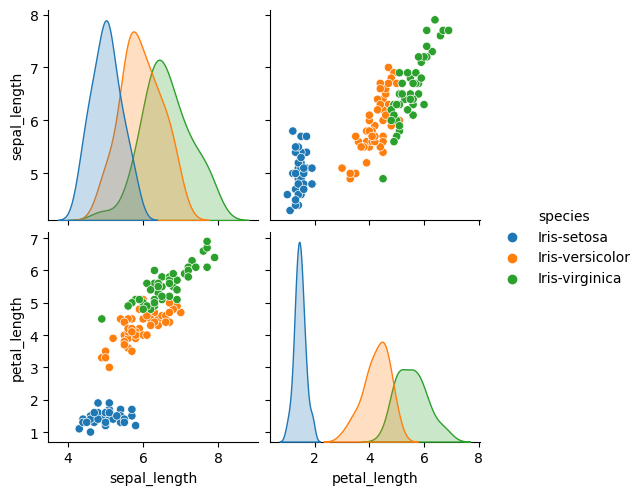

In [8]:
# Visualize the whole dataset
sns.pairplot(df, hue='species')

# 📊 Bar Plot

In [9]:
# Separate features and target  
data = df.values
X = data[:,0:2]
Y = data[:,2]

In [10]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(2, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

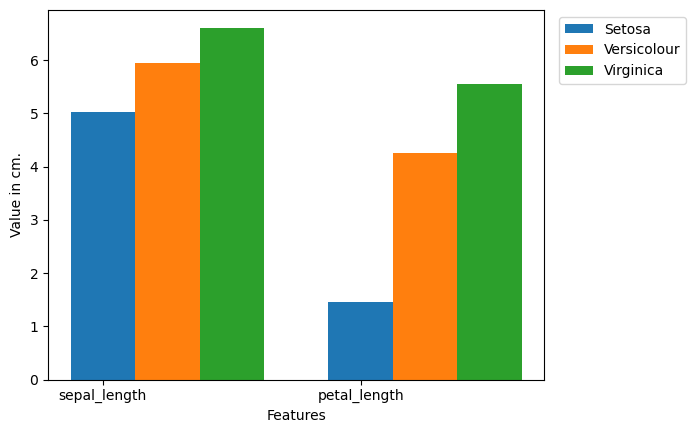

In [11]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:2])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# 🛠️ Feature Engineering

In [12]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


# 📈Model Training: Support Vector Classifier

In [13]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [14]:
# Predict from the test dataset
svc_pred = svn.predict(X_test)

# 📈 Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
model_pred = model.predict(X_test)

# 📈 K-Nearest Neighbour (KNN)

In [17]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
clf_pred = clf.predict(X_test)

# 📈 Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [20]:
nb_pred = nb.predict(X_test)

# 🧪Model Evaluation

# 🧪Confusion Matrix


In [21]:
confusion_matrix(y_test, model_pred)

array([[10,  0,  0],
       [ 0,  6,  0],
       [ 0,  0,  9]])

In [22]:
confusion_matrix(y_test, clf_pred)

array([[10,  0,  0],
       [ 0,  6,  0],
       [ 0,  1,  8]])

In [23]:
confusion_matrix(y_test, svc_pred)

array([[10,  0,  0],
       [ 0,  6,  0],
       [ 0,  0,  9]])

In [24]:
confusion_matrix(y_test, nb_pred)

array([[10,  0,  0],
       [ 0,  4,  2],
       [ 0,  0,  9]])

# 🧪All Model Accuracy score

In [25]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svc_pred)

1.0

In [26]:
#Logistic Regression
accuracy_score(model_pred, y_test)

1.0

In [27]:
#KNN
accuracy_score(y_test,clf_pred)

0.96

In [28]:
#Naive Bayes
accuracy_score(y_test,nb_pred)

0.92

# 🎯Model Predictions

In [29]:
svc_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
model_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
clf_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
nb_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [33]:
X_new = np.array([[3, 2], [  4.9, 2.2 ], [  6.3, 3.5]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor']
